In [15]:
# imports and settings
%run plot_settings.py
%matplotlib inline

# load experimental data
path_data = '/Users/baumgaer/ownCloud/GitHub/gene_transcription_SMC_ABC/experimental_data/'

data_0pME2 = np.loadtxt(path_data+'data_0pME2.csv')
data_5pME2 = np.loadtxt(path_data+'data_5pME2.csv')
data_7pME2 = np.loadtxt(path_data+'data_7pME2.csv')
data_10pME2 = np.loadtxt(path_data+'data_10pME2.csv')
data_14pME2 = np.loadtxt(path_data+'data_14pME2.csv')
data_20pME2 = np.loadtxt(path_data+'data_20pME2.csv')
data_100pME2 = np.loadtxt(path_data+'data_100pME2.csv')
data_1000pME2 = np.loadtxt(path_data+'data_1000pME2.csv')

mock_0pME2 = np.loadtxt(path_data+'mock_0pME2.csv')
mock_5pME2 = np.loadtxt(path_data+'mock_5pME2.csv')
mock_7pME2 = np.loadtxt(path_data+'mock_7pME2.csv')
mock_10pME2 = np.loadtxt(path_data+'mock_10pME2.csv')
mock_14pME2 = np.loadtxt(path_data+'mock_14pME2.csv')
mock_20pME2 = np.loadtxt(path_data+'mock_20pME2.csv')
mock_100pME2 = np.loadtxt(path_data+'mock_100pME2.csv')
mock_1000pME2 = np.loadtxt(path_data+'mock_1000pME2.csv')

# Figure 2

All color maps as in Figure 2EV which contain the panels shown in the main Fig 2.

In [22]:
def figure_2(data, mock,
             conc=['0 pM E2', '5 pM E2', '7 pM E2', '10 pM E2', '14 pM E2', '20 pM E2','100 pM E2', '1000 pM E2'],
             save=[False]):
    
    index = np.arange(0, len(data))
    factor = [33.15, 33.15, 33.15, 33.15, 33.15, 33.15, 23.15, 23.15]

    AUC = []
    Inds = []
    ZScore = []
    for ii in index:
        dd = data[ii].transpose()
        mm = mock[ii]

        auc = np.trapz(dd, dx=3, axis=1)
        auc = auc / factor[ii] / 29

        ind_sort = np.argsort(auc)
        auc_sort = np.argsort(-auc)

        ZScore.append(dd[ind_sort, :] / factor[ii])
        Inds.append(np.arange(0, len(auc)))
        AUC.append(auc[auc_sort])

    cmap = matplotlib.cm.viridis

    aspect = 'auto'
    interpolation = 'none'

    ticks = np.arange(0, 250, 50)

    matplotlib.rcParams.update({'font.size': 14, 'font.family': 'sans', 'axes.grid': False})

    fig = pl.figure(figsize=(14, 25))

    gs = gridspec.GridSpec(38, 15)

    inds = [[73, 37, 10], [92, 50, 0], [70, 45, 5], [80, 45, 5], [72, 37, 5], [80, 40, 5], [60, 30, 5], [58, 30, 5]]
    text_ind = [37, 46, 39, 40, 37, 41, 30, 30]
    cols = ['darkorange', 'dodgerblue', 'crimson']
    #     ON = []
    #     OFF = []
    length = 2
    thresh = 9

    for ii in index:
        #         on,ints,off = find_on_time(data[ii],mock[ii],thresh,length)
        #         ON.append(on)
        #         OFF.append(off)

        ax = fig.add_subplot(gs[(ii) * 4:(ii) * 4 + 3, 0:4])
        cax1 = ax.imshow(ZScore[ii], aspect=aspect, interpolation=interpolation, cmap=cmap)
        cax1.set_clim(0, 50)

        ax.set_yticks([])
        ax.set_xticks(ticks)
        ax.set_ylabel('Cells')
        ax.text(-120, text_ind[ii], conc[ii])
        ax.yaxis.labelpad = -1
        if ii < len(data) - 1:
            ax.set_xticks(ticks)
            ax.set_xticklabels(ticks * 3)
        else:
            ax.set_xticks(ticks)
            ax.set_xticklabels(ticks * 3)
            ax.set_xlabel('Time (min)')

        ax = fig.add_subplot(gs[(ii) * 4:(ii) * 4 + 3, 4])
        ax.plot(AUC[ii], Inds[ii], lw=3, color='dimgrey')
        for jj in np.arange(0, 3):
            ax.plot([-100, 30000], [ZScore[ii].shape[0] - inds[ii][jj], ZScore[ii].shape[0] - inds[ii][jj]], '--',
                    lw=2,
                    color=cols[jj])
        ax.set_ylim(0, len(AUC[ii]))
        ax.set_yticks([])
        ax.set_xlim(-50, np.max(AUC[len(data) - 1]) + 100)
        ax.set_xticks([0, 1200])

        if ii == len(data) - 1:
            ax.set_xlabel('# RNA')

        ax = fig.add_subplot(gs[(ii) * 4:(ii) * 4 + 3, 6:10])
        tt = np.arange(0, 250) * 3
        for jj in np.arange(0, 3):
            ax.plot(tt, ZScore[ii][inds[ii][jj]], lw=2, color=cols[jj])
        ax.set_xticks(ticks * 3)
        ax.set_ylim(0, 100)
        ax.set_xlim(0, 750)
        ax.set_ylabel('# RNA')
        ax.yaxis.labelpad = -5
        if ii < len(data) - 1:
            ax.set_xticklabels(ticks * 3)
        else:
            ax.set_xlabel('Time (min)')

        ax = fig.add_subplot(gs[(ii) * 4:(ii) * 4 + 3, 11:])
        ts, acf = smc.acf_sliding_window(data[ii], smc.win)
        res = np.zeros((3, len(acf), acf[0].shape[0]))
        for jj in np.arange(0, len(acf)):
            res[0, jj, :] = acf[jj][:, inds[ii][0]]
            res[1, jj, :] = acf[jj][:, inds[ii][1]]
            res[2, jj, :] = acf[jj][:, inds[ii][2]]
        res_mean = res.mean(axis=1)
        tt = np.arange(0, 125) * 3
        for jj in np.arange(0, 3):
            ax.plot(tt, res_mean[jj], lw=2, color=cols[jj])

        ax.set_xlim(0, 150)
        ax.set_ylim(-0.5, 1)
        ax.set_ylabel('ACF')
        ax.yaxis.labelpad = -5
        xticks = [0, 50, 100, 150]
        ax.set_xticks(xticks)
        if ii < len(data) - 1:
            ax.set_xticklabels(xticks)
        else:
            ax.set_xlabel('Time (min)')

    cbar = fig.add_axes([0.1255, 0.915, 0.199, 0.01])
    fig.colorbar(cax1, cax=cbar, orientation="horizontal", ticks=[0, 25, 50])
    cbar.set_xlabel('# RNA', labelpad=-57)

    if save[0] == True:
        pl.savefig(save[1] + save[2], dpi=save[3])


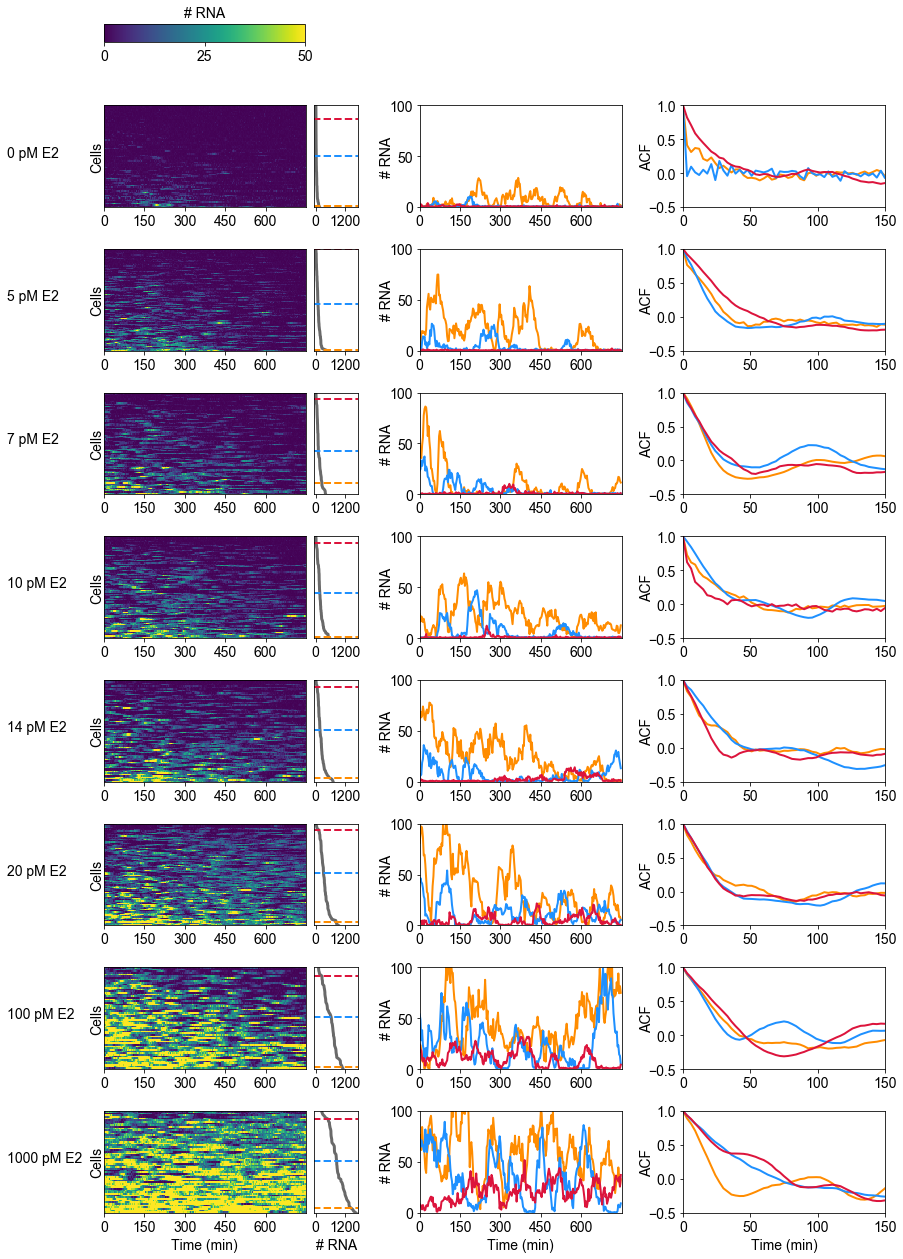

In [24]:
data_fig_2 = [data_0pME2,data_5pME2,data_7pME2,data_10pME2,data_14pME2,data_20pME2,data_100pME2,data_1000pME2]
mock_fig_2 = [mock_0pME2,mock_5pME2,mock_7pME2,mock_10pME2,mock_14pME2,mock_20pME2,mock_100pME2,mock_1000pME2]

figure_2(data_fig_2,mock_fig_2)

# Global intensity histogram

As shown in figures 2 and EV2

In [41]:
def global_hist(data,mock,
               conc=['0 pM E2', '5 pM E2', '7 pM E2', '10 pM E2', '14 pM E2', '20 pM E2','100 pM E2', '1000 pM E2']):
    fig,ax = pl.subplots(1,1, figsize = (12,8))
    
    factor = [33.15, 33.15, 33.15, 33.15, 33.15, 33.15, 23.15, 23.15]
    
    Hist = []
    Hist_mock = []
    bins, hist = calc_histogram(np.hstack(mock))
    ax.fill_between(bins / factor[1], 0, hist, color=color_bg, alpha=0.5)

    for ii,dd in enumerate(data):
        bins, hist = calc_histogram(dd)
        ax.plot(bins / factor[ii], hist, lw=3, label=conc[ii], color=colors_conditions[ii])

    ax.set_xscale('log')
    ax.set_ylabel('Density')
    ax.set_xlabel('# RNA')
    ax.xaxis.labelpad = -2
    ax.set_ylim(0, 0.25)
    ax.set_xlim(0.1, 200)
    ax.legend(loc='best', fontsize = 15)



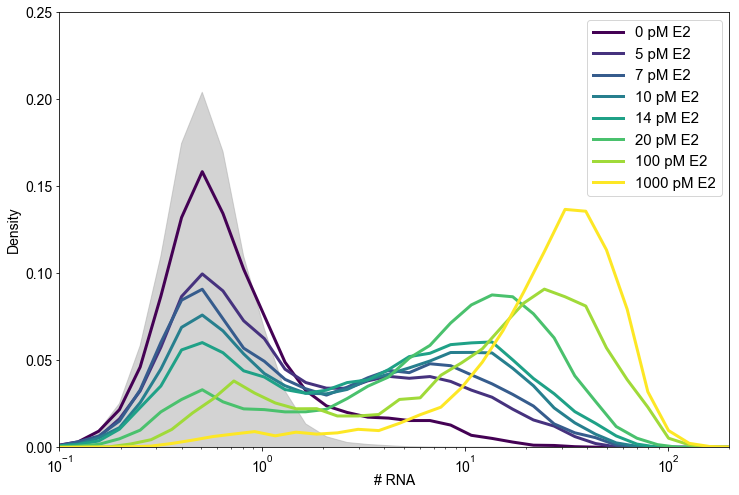

In [42]:
global_hist(data_fig_2,mock_fig_2)